<a href="https://colab.research.google.com/github/DianaMugho/PowerBI-projects/blob/main/India_USA_inflation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
inf_rates=pd.read_csv('/content/Inflation_Rates_Transformed-1.csv')
exch_rates=pd.read_csv('/content/USD_INR_Exchange_Rates_1980_2024.csv')
exch_rates.head(10)
inf_rates.tail(10)

,Country,Year,Inflation Rate
140,Emerging market and developing economies,2026,4.9
141,India,2027,4.0
142,United States,2027,2.1
143,Emerging market and developing economies,2027,4.4
144,India,2028,4.0
145,United States,2028,2.1
146,Emerging market and developing economies,2028,4.3
147,India,2029,4.0
148,United States,2029,2.1
149,Emerging market and developing economies,2029,4.2


In [ ]:
exch_rates.head(10)

,Year,Average Exchange Rate (INR/USD)
0,2003,45.476087
1,2004,45.188604
2,2005,44.003753
3,2006,45.183561
4,2007,41.192248
5,2008,43.464831
6,2009,48.283335
7,2010,45.621969
8,2011,46.562903
9,2012,53.404276


In [ ]:
# filtering the inflation data for India and the United States
inflation_filtered = inf_rates.query("Country == 'India' or Country == 'United States'")

# pivot the inflation data to have separate columns for India and the United States inflation rates
inflation_pivot = inflation_filtered.pivot(index='Year', columns='Country', values='Inflation Rate').reset_index()

# merge the exchange rates data with the inflation data
merged_df = pd.merge(exch_rates, inflation_pivot, on='Year')

# renaming columns
#merged_df.columns = ['Year', 'Exchange Rate (INR/USD)', 'Inflation Rate (India)', 'Inflation Rate (United States)']


In [ ]:
merged_df.head()

,Year,Average Exchange Rate (INR/USD),India,United States
0,2003,45.476087,4.1,2.3
1,2004,45.188604,4.0,2.7
2,2005,44.003753,3.7,3.4
3,2006,45.183561,6.7,3.2
4,2007,41.192248,5.9,2.9


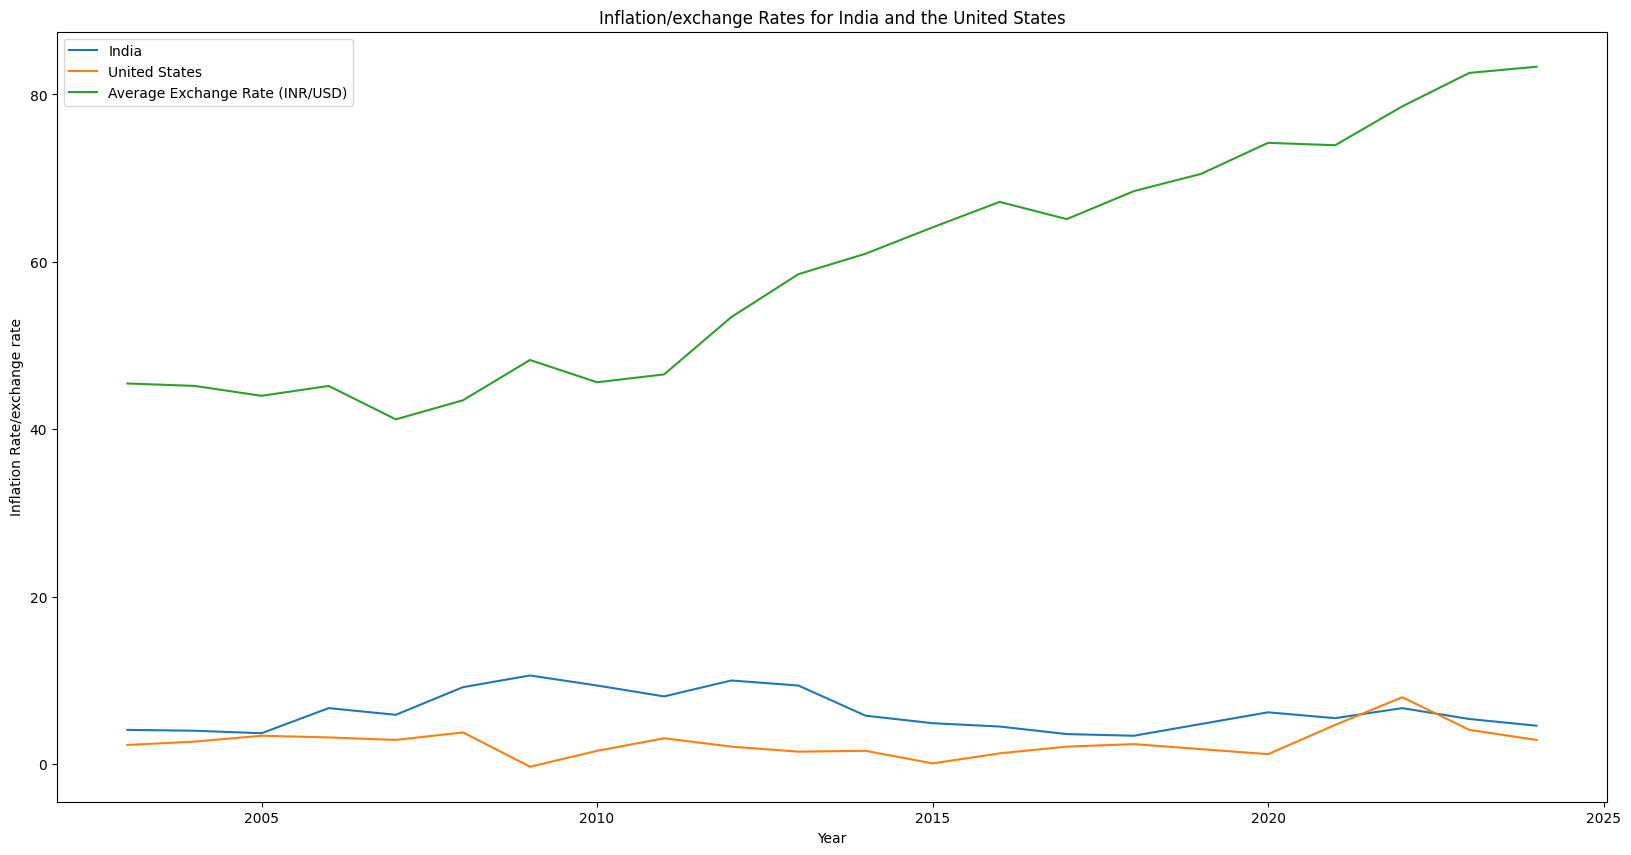

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px


# customizing the figure
plt.figure(figsize=(20,10))
plt.plot(merged_df['Year'], merged_df['India'], label='India')
plt.plot(merged_df['Year'], merged_df['United States'], label='United States')
plt.plot(merged_df['Year'], merged_df['Average Exchange Rate (INR/USD)'], label='Average Exchange Rate (INR/USD)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate/exchange rate')
plt.title('Inflation/exchange Rates for India and the United States')
plt.legend()
plt.show()

#Plotting the line graph to monitor the trend in inflation
fig = px.line(merged_df, x='Year', y=['India', 'United States'],
              title='Inflation Rates for India and the United States')
fig.show()


# Findings from the comparative analysis:

1.Early 2000s: A period of high inflation in India
coincides with a period of relative stability in the exchange rate. It suggests that factors other than inflation may have been driving the exchange rate during this time.
2.Late 2000s to Early 2010s: The period shows some alignment between rising inflation in India and a weakening INR, which indicates that inflation could be contributing to exchange rate movements.
3.2015 Onwards: The exchange rate continues to rise, while both India’s and the United States’ inflation rates remain relatively low. This divergence suggests that the exchange rate is influenced by additional factors beyond inflation, such as economic growth, monetary policy, and international trade dynamics.

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport
myreport= ProfileReport(merged_df, title="USA/INDIA INFLATION IMPACT PROFILE REPORT",explorative=True)
myreport.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
correlation=merged_df[['Average Exchange Rate (INR/USD)','India','United States']].corr()
correlation

,Average Exchange Rate (INR/USD),India,United States
Average Exchange Rate (INR/USD),1.000000,-0.337748,0.235321
India,-0.337748,1.000000,-0.120503
United States,0.235321,-0.120503,1.000000


# Findings from the correlation analysis:

Exchange Rate vs. Inflation Rate (India): The correlation coefficient is approximately -0.34, which indicates a weak negative relationship. It suggests that as inflation in India increases, the INR tends to depreciate against the USD, though the relationship is not very strong.
Exchange Rate vs. Inflation Rate (United States): The correlation coefficient is approximately 0.24, which indicates a weak positive relationship. It suggests that higher inflation in the United States might be associated with a depreciation of the USD against the INR, but again, the relationship is not strong.
Inflation Rate (India) vs. Inflation Rate (United States): The correlation between the inflation rates of India and the United States is very weak and negative (-0.12), which indicates that the inflation rates in these two countries do not move together.

In [ ]:
#analyse using the ppurchasing power parity(PPP)
initial_exchange_rate=merged_df['Average Exchange Rate (INR/USD)'].iloc[0]
merged_df['expected_exchange_rate']=initial_exchange_rate *(
 (1+merged_df['India']/100)/(1+merged_df['United States']/100)).cumprod()
merged_df.head()


,Year,Average Exchange Rate (INR/USD),India,United States,expected_exchange_rate
0,2003,45.476087,4.1,2.3,46.276253
1,2004,45.188604,4.0,2.7,46.862028
2,2005,44.003753,3.7,3.4,46.997991
3,2006,45.183561,6.7,3.2,48.591916
4,2007,41.192248,5.9,2.9,50.008589


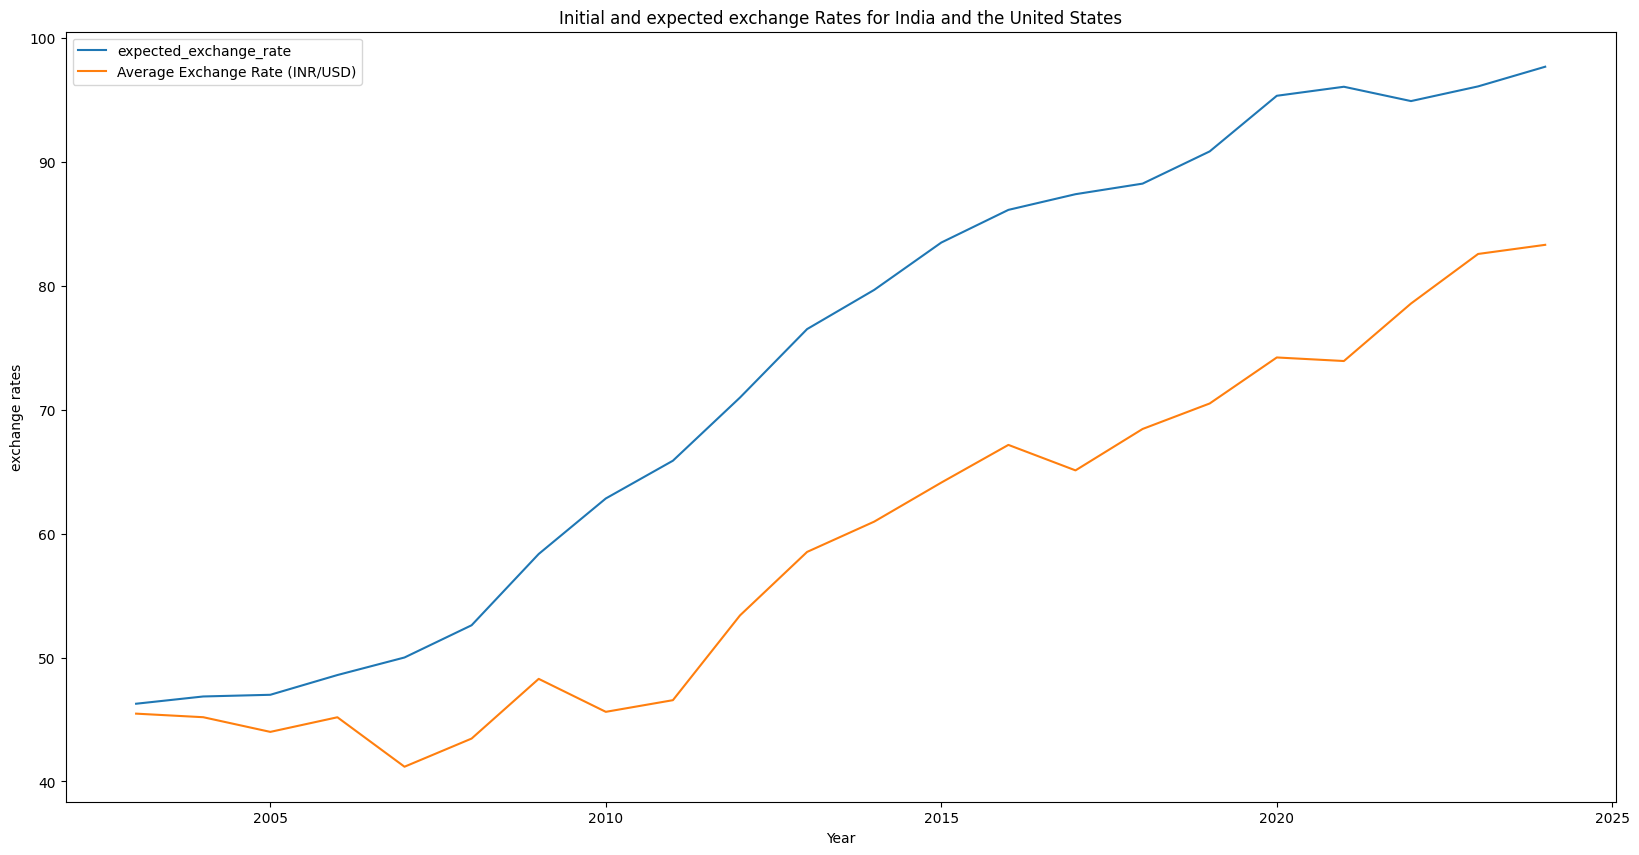

In [ ]:
plt.figure(figsize=(20,10))

plt.plot(merged_df['Year'], merged_df['expected_exchange_rate'], label='expected_exchange_rate')
plt.plot(merged_df['Year'], merged_df['Average Exchange Rate (INR/USD)'], label='Average Exchange Rate (INR/USD)')
plt.xlabel('Year')
plt.ylabel('exchange rates')
plt.title('Initial and expected exchange Rates for India and the United States')
plt.legend()
plt.show()

#Plotting the line graph to monitor the trend in inflation
fig = px.line(merged_df, x='Year', y=['expected_exchange_rate', 'Average Exchange Rate (INR/USD)'],
              title='Initial and expected exchange Rates for India and the United States')
fig.show()